


 **Sales Performance & Customer Insights Analysis**




To analyze the SuperStore Orders dataset in order to identify sales trends, evaluate category and regional performance, and identify high-value customers for data-driven business decision-making.

In [36]:
#mport Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Load the Dataset
df = pd.read_csv("/SuperStore_Orders.csv", encoding="latin1")
df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [12]:
#Understand the Data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [15]:
#Convert Order Date to Date Format
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

In [16]:
#Handle Missing Values
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [17]:
#Remove Duplicate Rows
df.drop_duplicates(inplace=True)

In [20]:
df['sales'].head(10)

,sales
0,408
1,120
2,66
3,45
4,114
5,55
6,314
7,276
8,912
9,667


In [21]:
df['sales'] = (
    df['sales']
    .str.replace(',', '', regex=True)
    .astype(float)
)

In [22]:
df[['sales', 'profit']].dtypes

,0
sales,float64
profit,float64


In [23]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['profit_margin'] = df['profit'] / df['sales'].replace(0, pd.NA)


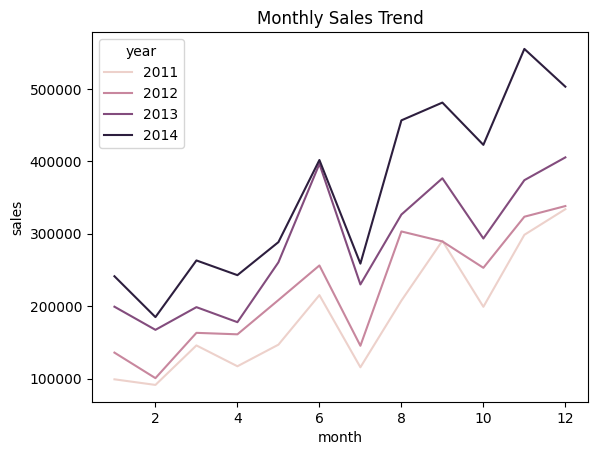

In [27]:
#Sales Trend Analysis (Time Series)
#5.1 Monthly Sales Trend
monthly_sales = df.groupby(['year','month'])['sales'].sum().reset_index()

plt.figure()
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year')
plt.title("Monthly Sales Trend")
plt.show()


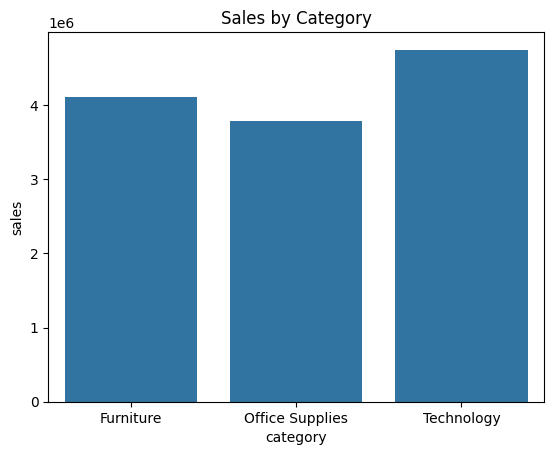

In [29]:
#Category Performance Analysis
#6.1 Sales by Category
category_sales = df.groupby('category')['sales'].sum().reset_index()

plt.figure()
sns.barplot(data=category_sales, x='category', y='sales')
plt.title("Sales by Category")
plt.show()

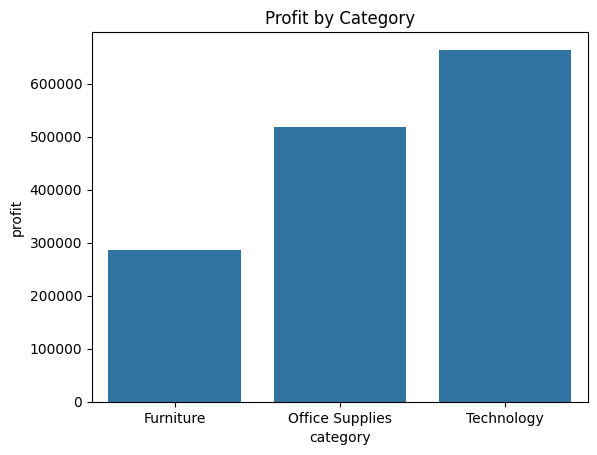

In [31]:
#6.2 Profit by Category
category_profit = df.groupby('category')['profit'].sum().reset_index()

plt.figure()
sns.barplot(data=category_profit, x='category', y='profit')
plt.title("Profit by Category")
plt.show()


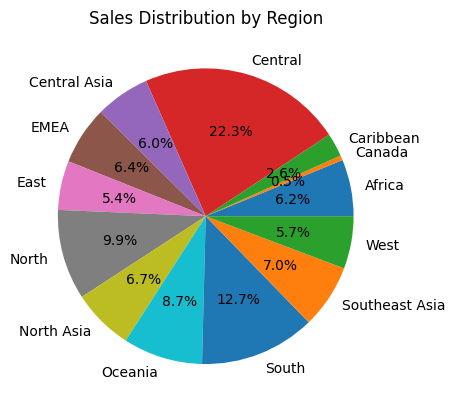

In [32]:
#Regional Performance Analysis
region_sales = df.groupby('region')['sales'].sum().reset_index()

plt.figure()
plt.pie(region_sales['sales'], labels=region_sales['region'], autopct='%1.1f%%')
plt.title("Sales Distribution by Region")
plt.show()

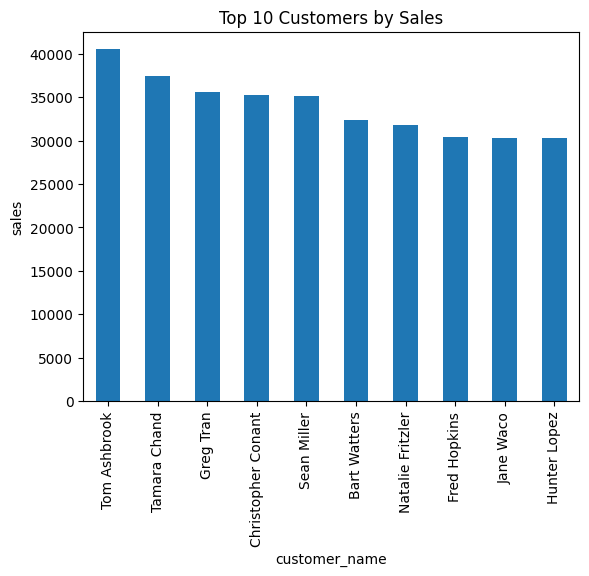

In [34]:
#Customer Analysis
#8.1 Top 10 Customers by Sales
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales")
plt.ylabel("sales")
plt.show()


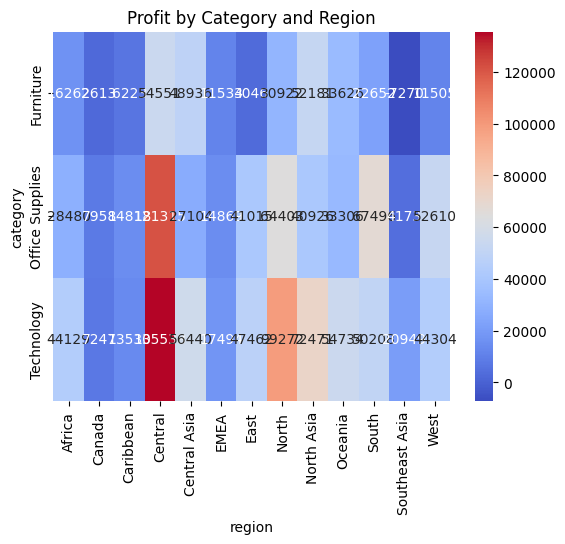

In [35]:
#Profitability Insight (Heatmap)
pivot_table = pd.pivot_table(
    df,
    values='profit',
    index='category',
    columns='region',
    aggfunc='sum'
)

plt.figure()
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Profit by Category and Region")
plt.show()